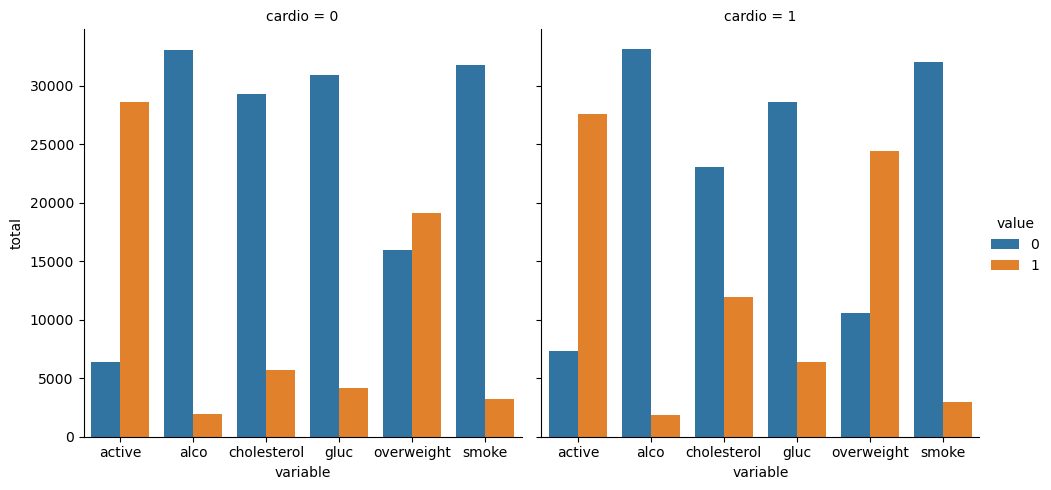

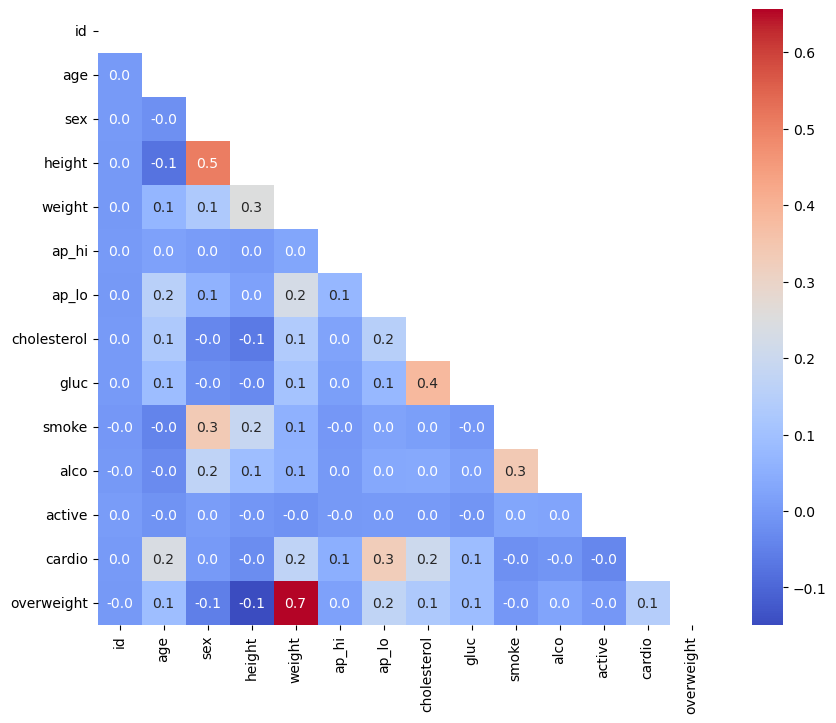

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('medical_examination.csv')

# Create the overweight column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)) > 25
df['overweight'] = df['overweight'].astype(int)

# Normalize cholesterol and gluc
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')
    return fig

def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                  (df['height'] >= df['height'].quantile(0.025)) & 
                  (df['height'] <= df['height'].quantile(0.975)) & 
                  (df['weight'] >= df['weight'].quantile(0.025)) & 
                  (df['weight'] <= df['weight'].quantile(0.975))]

    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', square=True)
    plt.show()

# Add main execution if needed to test the functions
if __name__ == "__main__":
    draw_cat_plot()
    draw_heat_map()
